In [21]:

import plotly.express as px
import seaborn as sns
import pandas as pd 
from matplotlib import pyplot as plt 

df = pd.read_csv(
    'data/ABNB_stock.csv'
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       454 non-null    object 
 1   Open       454 non-null    float64
 2   High       454 non-null    float64
 3   Low        454 non-null    float64
 4   Close      454 non-null    float64
 5   Adj Close  454 non-null    float64
 6   Volume     454 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 25.0+ KB


In [9]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,146.550003,151.500000,135.100006,139.25,139.25,26980800
1,2020-12-14,135.000000,135.300003,125.160004,130.00,130.00,16966100


<Axes: xlabel='Date', ylabel='Close'>

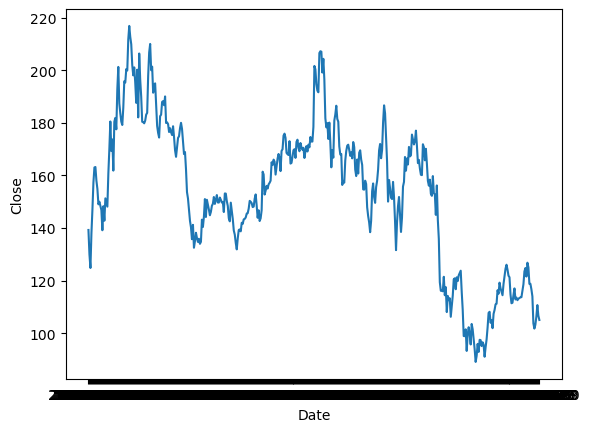

In [13]:
fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Close', data=df)

# 문제점 날짜가 안보임 

In [15]:
# datatime type으로만 변환해도 됨
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700
...,...,...,...,...,...,...,...
449,2022-09-26,101.779999,105.360001,101.559998,103.230003,103.230003,5278800
450,2022-09-27,106.040001,108.169998,104.139999,106.370003,106.370003,5081000
451,2022-09-28,106.700996,111.129997,105.779999,110.690002,110.690002,4518200
452,2022-09-29,109.190002,109.474998,105.169998,106.660004,106.660004,4259500


<Axes: xlabel='Date', ylabel='Close'>

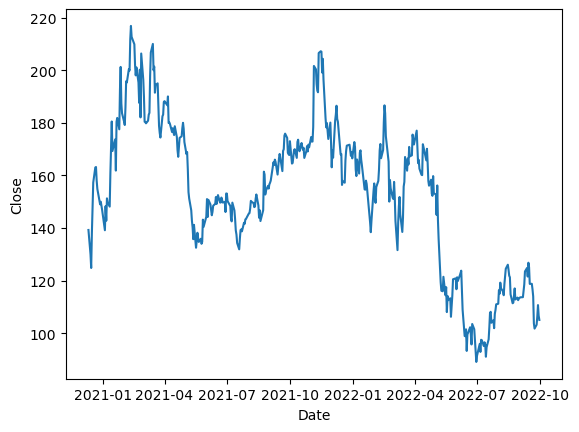

In [16]:
fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Close', data=df)

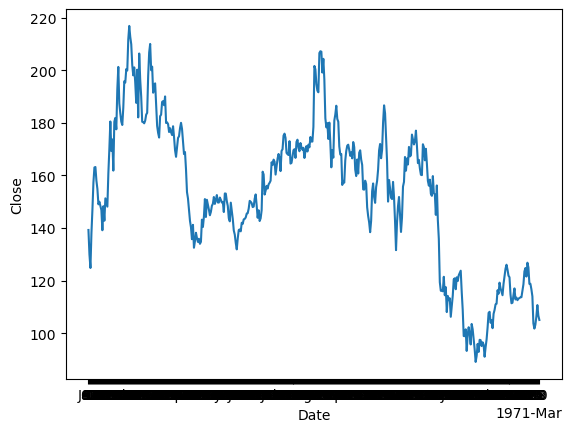

In [24]:
# y축 레벨 회전, 표현방식을 변경 > fomatter 이용

import matplotlib as mpl
fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Close', data=df, ax=ax)
ax.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_formatter()))

In [23]:
#plotly line

px.line(data_frame=df
        , x='Date'
        , y='Close'
        , width=500
        , height=400)


In [27]:
fig = px.line(data_frame=df
        , x='Date'
        , y='Close'
        , width=500
        , height=400)

fig.update_xaxes(tickformat='%Y-%m-%d')

# 1. 다중 축 차트 

기본차트 x,y+y1,y2 -> 하나의 ax에 그리기

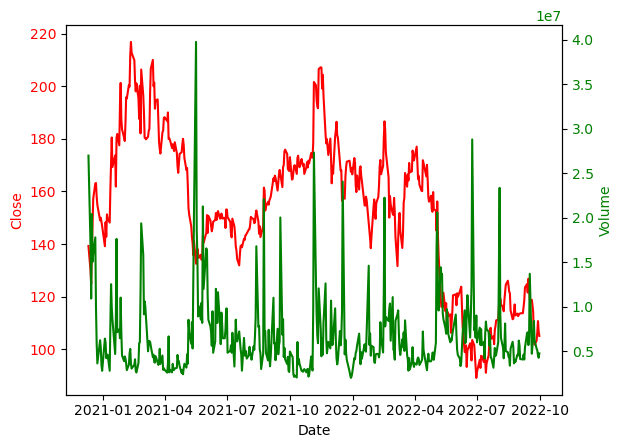

In [36]:
fig,ax = plt.subplots()
ax2 = ax.twinx()

sns.lineplot(x='Date', y='Close', data=df, ax= ax, color='red' )
sns.lineplot(x='Date', y='Volume', data=df, ax= ax2, color='green' )

#왼쪽 y축 정보 설정
ax.tick_params(axis='y', labelcolor='red')
ax.yaxis.label.set_color('red')

#오른쪽 y축 정보 설정
ax2.tick_params(axis='y', labelcolor='green')
ax2.yaxis.label.set_color('green')

#x축 정보 설정
df['Date'] = pd.to_datetime(df['Date'])

In [40]:
df_abnb = df
df_abnb

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700
...,...,...,...,...,...,...,...
449,2022-09-26,101.779999,105.360001,101.559998,103.230003,103.230003,5278800
450,2022-09-27,106.040001,108.169998,104.139999,106.370003,106.370003,5081000
451,2022-09-28,106.700996,111.129997,105.779999,110.690002,110.690002,4518200
452,2022-09-29,109.190002,109.474998,105.169998,106.660004,106.660004,4259500


In [41]:
# 3개의 축 
# 최고가 - 최저가 = Hight_Low 변수 추가 

df_abnb['High_Low'] = df_abnb['High'] - df_abnb['Low']
df_abnb.head()


,Date,Open,High,Low,Close,Adj Close,Volume,High_Low
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800,16.399994
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100,10.139999
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,6.099998
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600,17.089996
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700,9.779999


<Axes: xlabel='Date', ylabel='High_Low'>

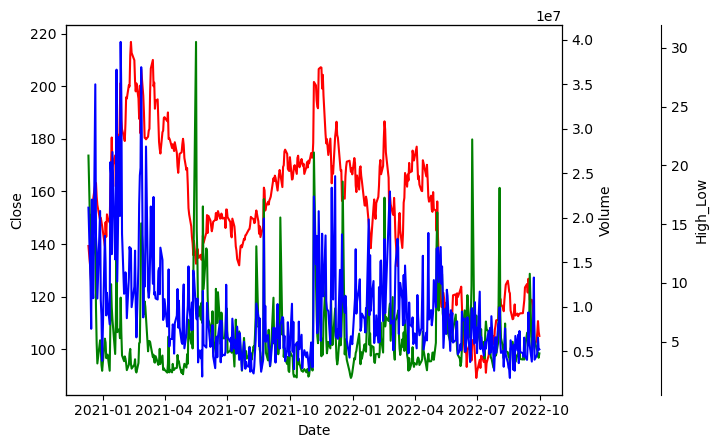

In [44]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax3 = ax.twinx()

ax3.spines.right.set_position(('axes', 1.2))# 현재축에서 위치 1에서 0.2만큼 오른쪽으로 이동 

sns.lineplot(x='Date', y='Close', data=df_abnb, ax= ax, color='red' )
sns.lineplot(x='Date', y='Volume', data=df_abnb, ax= ax2, color='green' )
sns.lineplot(x='Date', y='High_Low', data=df_abnb, ax= ax3, color='blue' )

#왼쪽 y축 정보 설정
ax.tick_params(axis='y', labelcolor='red')
ax.yaxis.label.set_color('red')

#오른쪽 y축 정보 설정
ax2.tick_params(axis='y', labelcolor='green')
ax2.yaxis.label.set_color('green')

#3번째 y축 정보 설정 

#x축 정보 설정
df['Date'] = pd.to_datetime(df['Date'])

In [52]:
#plotly 로 2중축 차트

from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y":True}]]) #2dimension list로 spec지정 

sub_fig_1 = px.line(df_abnb, x='Date', y='Close')
sub_fig_1.update_traces(line_color='red')
sub_fig_2 = px.line(df_abnb, x='Date', y='Volume')
sub_fig_2.update_traces(line_color='blue')

sub_fig_2.update_traces(yaxis='y2')
fig.add_traces(sub_fig_1.data + sub_fig_2.data)

#레이블 설정
fig.layout.xaxis.title = 'Date'
fig.layout.yaxis.title = 'Close'
fig.layout.yaxis.color = 'red'
fig.layout.yaxis2.title = 'Volume'
fig.layout.yaxis2.color = 'blue'

fig.update_layout(width=400, height=400)

In [91]:
# 3개 축 그리기

import plotly.graph_objects as go

fig = make_subplots()
fig.add_trace(
    go.Scatter(
        x=df_abnb['Date'], y=df_abnb['Close'],name='Close',
        mode='lines',yaxis='y', line={'color':'red'}
        ) #1번째축
)
fig.add_trace(
    go.Scatter(
        x=df_abnb['Date'], y=df_abnb['Volume'],name='Volume',
        mode='lines',yaxis='y2', line={'color':'blue'}
        ) #2번째축 Volume
)
fig.add_trace(
    go.Scatter(
        x=df_abnb['Date'], y=df_abnb['High_Low'],name='High_Low',
        mode='lines',yaxis='y3', line={'color':'green'}
        ) #3번째축
)
fig.update_layout(
    yaxis = dict(title = 'Close'),
    yaxis2 = dict(title = 'Volume', position=1, side='right', overlaying='y',anchor='free'),
    yaxis3 = dict(title = 'High_Low' ,side='right', anchor='x', overlaying='y'),
    xaxis = dict(title = 'Date', domain=[.1,.85]),
    width = 600, height=400
)
fig.layout.yaxis.color = 'red'
fig.layout.yaxis2.color = 'blue'
fig.layout.yaxis3.color = 'green'

fig.show()



In [62]:
#graph_object 3개 축 그리기
import plotly.graph_objects as go

fig = make_subplots()
fig.add_trace(
  go.Scatter(
    x=df_abnb['Date'], y=df_abnb['Close'], name='Close',
    mode='lines', yaxis='y', line={'color':'red'}
    ) #1번째 축
)
fig.add_trace(
  go.Scatter(
    x=df_abnb['Date'], y=df_abnb['Volume'], name='Volume',
    mode='lines', yaxis='y2', line={'color':'blue'}
    ) #2번째 축 Volume
)
fig.add_trace(
  go.Scatter(
    x=df_abnb['Date'], y=df_abnb['High_Low'], name='High_Low',
    mode='lines', yaxis='y3', line={'color':'green'}
    ) #3번째 축 High-Low
)
fig.update_layout(
  yaxis = dict(title='Close'),
  yaxis2 = dict(title='Volume', position=1, side='right', overlaying='y', anchor='free'),
  yaxis3 = dict(title='High-Low', side='right', anchor='x', overlaying='y'),
  xaxis = dict(title='Date', domain=[.1, .85]),
  width=600, height=400
)
fig.layout.yaxis.color = 'red'
fig.layout.yaxis2.color = 'blue'
fig.layout.yaxis3.color = 'green'

fig.show()

# 범례 위치 조정하기

In [67]:
co_df = pd.read_csv('data/CO2_Emissions.csv')
co_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

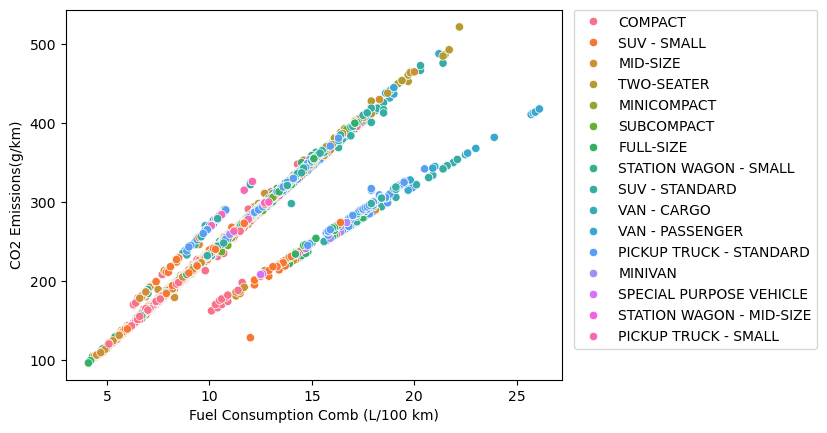

In [75]:

fig, ax = plt.subplots()
sns.scatterplot(
    x= 'Fuel Consumption Comb (L/100 km)',
    y= 'CO2 Emissions(g/km)',
    data =  co_df,
    hue='Vehicle Class',
    ax=ax
)

ax.legend(bbox_to_anchor=(1.01, 1.02)) # 왼쪽 하단 0.0, 오른쪽 상단 1.1

In [ ]:
from plotly.subplots import make_subplots
import plotly.express as px

# 여러 개의 그래프(서브플롯)를 넣을 수 있는 빈 도화지 만들기
fig = make_subplots()

# 산점도(Scatter Plot) 그리기
px.scatter(
    data_frame=co_df,                        # 사용할 데이터프레임 (자동차 데이터라고 가정)
    x='Fuel Consumption Comb (L/100 km)',    # X축 → 연료 소비량 (리터/100km)
    y='CO2 Emissions(g/km)',                 # Y축 → CO2 배출량 (g/km)
    width=600,                               # 그래프 가로 크기
    height=400,                              # 그래프 세로 크기
    color='Vehicle Class'                    # 점 색깔을 차량 종류별로 다르게 표시, 범례 자동생성 
)

## 강조하기 

테두리 색, 굵기 조정

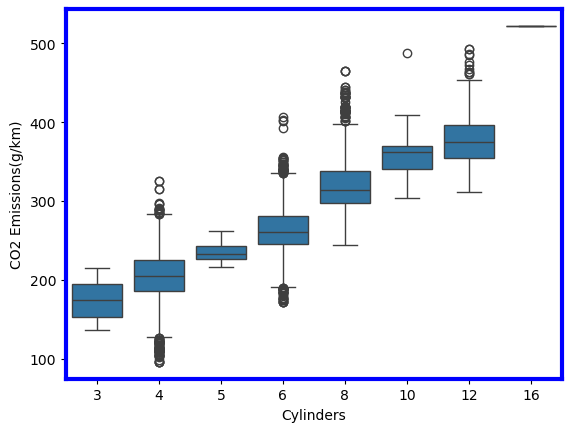

In [95]:
fig,ax = plt.subplots()
sns.boxplot(
    x='Cylinders'
    , y= 'CO2 Emissions(g/km)'
    , data= co_df
    , ax= ax
)
spines = ['left', 'right', 'top', 'bottom']
for spin in spines:
    ax.spines[spin].set_color('blue')
    ax.spines[spin].set_linewidth(3)

In [103]:
# plotly 테두리 강조하기 - 검정색으로 

fig = px.box(
    x='Cylinders'
    , y= 'CO2 Emissions(g/km)'
    , data_frame=co_df
)
fig.update_xaxes(showline=True, linecolor='black', linewidth=3, mirror=True)
fig.update_yaxes(showline=True, linecolor='black', linewidth=3, mirror=True) #매개변수로 설정 
fig.show()

Text(0.205, 1.05, 'Fule type Ethanol emits less co2')

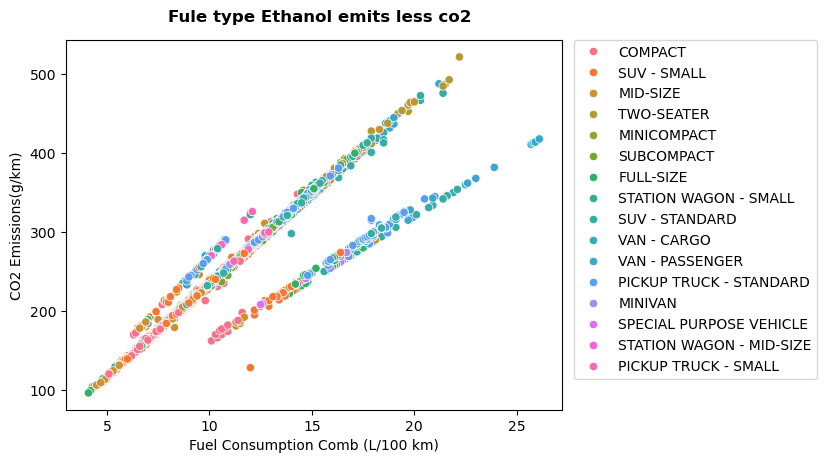

In [128]:
# 텍스트, annotate()로 표시하기


fig, ax = plt.subplots()
sns.scatterplot(
    x= 'Fuel Consumption Comb (L/100 km)',
    y= 'CO2 Emissions(g/km)',
    data =  co_df,
    hue='Vehicle Class',
    ax=ax
)
ax.legend(bbox_to_anchor=(1.01, 1.02)) # 왼쪽 하단 0.0, 오른쪽 상단 1.1
ax.text(
    x=0.205, y=1.05 # 상대좌표 
    , s='Fule type Ethanol emits less co2'
    , fontdict={'fontsize':12, 'weight':'bold'}
    , transform = ax.transAxes # 상대좌표를 전달
)

Text(21, 310, 'Fule type Ethanol emits less co2')

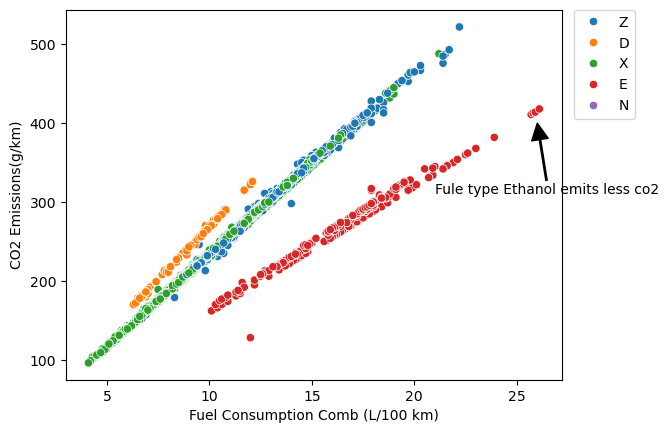

In [130]:
# annotate()로 표시하기


fig, ax = plt.subplots()
sns.scatterplot(
    x= 'Fuel Consumption Comb (L/100 km)',
    y= 'CO2 Emissions(g/km)',
    data =  co_df,
    hue='Fuel Type',
    ax=ax
)
ax.legend(bbox_to_anchor=(1.01, 1.02)) # 왼쪽 하단 0.0, 오른쪽 상단 1.1
ax.annotate(
    xy= (26,400) # 절대좌표 
    , text ='Fule type Ethanol emits less co2'
    ,xytext=(21,310)
    ,arrowprops={'color':'black', 'width':1}
    # , fontdict={'fontsize':12, 'weight':'bold'}
    # , transform = ax.transAxes # 상대좌표를 전달
)

Text(0.73, 0.5, 'Fule type Ethanol emits less co2')

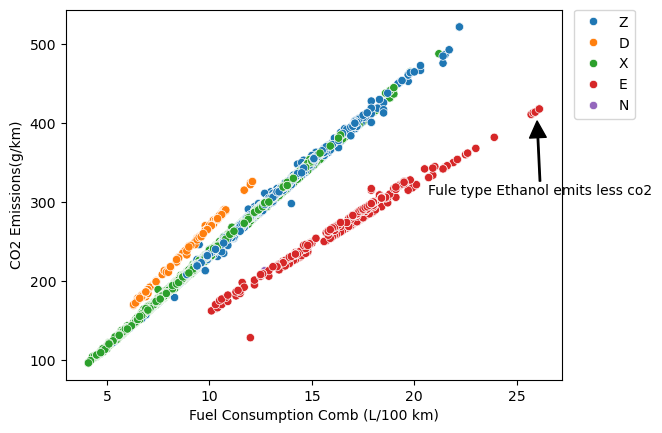

In [133]:
# annotate()로 표시하기


fig, ax = plt.subplots()
sns.scatterplot(
    x= 'Fuel Consumption Comb (L/100 km)',
    y= 'CO2 Emissions(g/km)',
    data =  co_df,
    hue='Fuel Type',
    ax=ax
)
ax.legend(bbox_to_anchor=(1.01, 1.02)) # 왼쪽 하단 0.0, 오른쪽 상단 1.1
ax.annotate(
    xy= (0.95,0.7) # 절대좌표 
    , text ='Fule type Ethanol emits less co2'
    ,xytext=(0.73,0.5)
    ,arrowprops={'color':'black', 'width':1}
    ,xycoords=ax.transAxes
)

In [134]:
co_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [138]:
fig = px.scatter(
    data_frame=co_df
    , x='Fuel Consumption Comb (L/100 km)'
    , y= 'CO2 Emissions(g/km)'
    , color= 'Fuel Type'
    ,width=800
    ,height=600
    
)
fig.add_annotation(
    # x=20
    # ,y=130
    x=0.9
    ,y=0.75
    ,text='<b>fuel type ethanol emits less co2 </b>'
    ,yref='y domain'
    ,xref='x domain'
    ,showarrow=True
    ,arrowhead=2
)
fig.show()

## 조건을 이용한 강조하기

In [142]:
df_ins = pd.read_csv(
    'data/product_inspection.csv'
)
df_ins['date'] = pd.to_datetime(df_ins['date'])
df_ins.info()
df_ins.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             429 non-null    datetime64[ns]
 1   inspection_step  429 non-null    object        
 2   value            429 non-null    float64       
 3   upper_spec       429 non-null    float64       
 4   target           429 non-null    float64       
 5   lower_spec       429 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 20.2+ KB


,date,inspection_step,value,upper_spec,target,lower_spec
0,2022-01-01,A,21.2,22.0,21.3,20.6
1,2022-01-02,A,21.7,22.0,21.3,20.6
2,2022-01-03,A,21.4,22.0,21.3,20.6
3,2022-01-04,A,21.5,22.0,21.3,20.6
4,2022-01-05,A,21.5,22.0,21.3,20.6


In [145]:
df_ins_A = df_ins.query("inspection_step=='A'")
df_ins_A

# 검사공정데이터 

,date,inspection_step,value,upper_spec,target,lower_spec
0,2022-01-01,A,21.2,22.0,21.3,20.6
1,2022-01-02,A,21.7,22.0,21.3,20.6
2,2022-01-03,A,21.4,22.0,21.3,20.6
3,2022-01-04,A,21.5,22.0,21.3,20.6
4,2022-01-05,A,21.5,22.0,21.3,20.6
...,...,...,...,...,...,...
138,2022-05-19,A,21.7,22.0,21.3,20.6
139,2022-05-20,A,21.6,22.0,21.3,20.6
140,2022-05-21,A,21.6,22.0,21.3,20.6
141,2022-05-22,A,21.4,22.0,21.3,20.6


C:\Users\Admin\AppData\Local\Temp\ipykernel_14276\3662102017.py:13: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



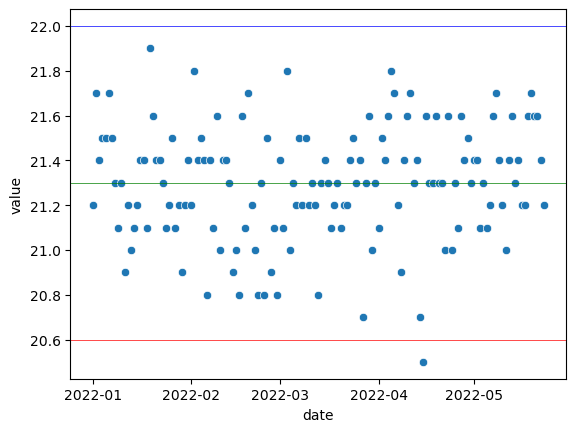

In [150]:
fig, ax = plt.subplots()
sns.scatterplot(
    data=df_ins_A
    ,x= 'date'
    ,y= 'value'
    ,ax=ax
    
)
#수평선 그리기
ax.axhline(df_ins_A['lower_spec'].iloc[-1],color='red', linewidth=0.5)
ax.axhline(df_ins_A['target'].iloc[-1],color='green', linewidth=0.5)
ax.axhline(df_ins_A['upper_spec'].iloc[-1],color='blue', linewidth=0.5)
fig.show()

In [206]:
fig = px.scatter(df_ins_A
                 , x='date'
                 , y='value'
                 , width=500
                 , height=400)

fig.add_hline(df_ins_A['lower_spec'].iloc[-1],line_color='red', line_width=0.5)
fig.add_hline(df_ins_A['target'].iloc[-1],line_color='green', line_width=0.5)
fig.add_hline(df_ins_A['upper_spec'].iloc[-1],line_color='blue', line_width=0.5)

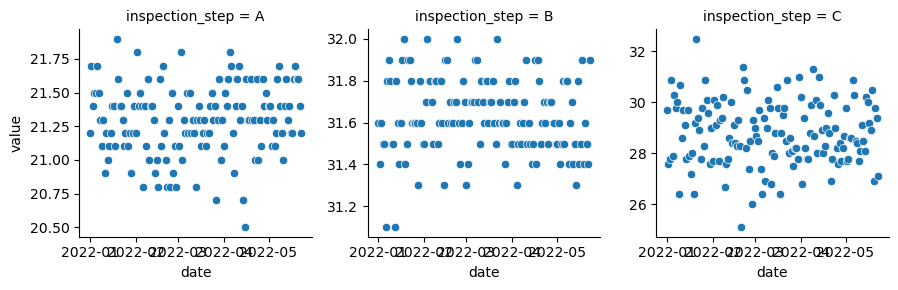

In [154]:
g = sns.FacetGrid(df_ins, sharex=False, sharey=False, col='inspection_step') # 검사 공정 값a,b,c 각각 차트 구분
g.map_dataframe(sns.scatterplot, x='date', y='value')


In [157]:
df_ins

,date,inspection_step,value,upper_spec,target,lower_spec
0,2022-01-01,A,21.2,22.0,21.3,20.6
1,2022-01-02,A,21.7,22.0,21.3,20.6
2,2022-01-03,A,21.4,22.0,21.3,20.6
3,2022-01-04,A,21.5,22.0,21.3,20.6
4,2022-01-05,A,21.5,22.0,21.3,20.6
...,...,...,...,...,...,...
424,2022-05-19,C,30.5,32.5,28.9,25.3
425,2022-05-20,C,26.9,32.5,28.9,25.3
426,2022-05-21,C,29.8,32.5,28.9,25.3
427,2022-05-22,C,29.4,32.5,28.9,25.3


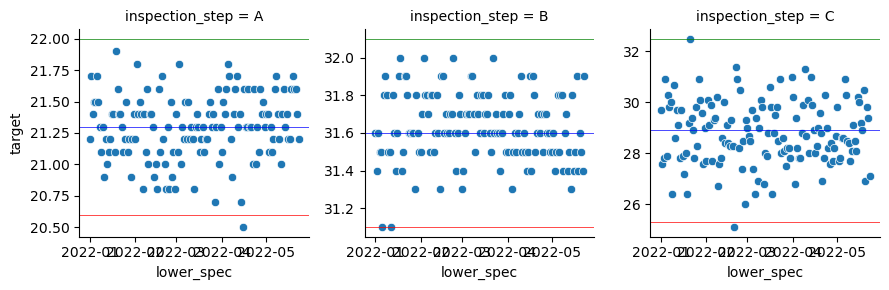

In [201]:
def custom(lower_spec, target, upper_spec, **kws): 
    ax=plt.gca()
    #수평선 그리기 
    ax.axhline(lower_spec.iloc[-1], color='red', linewidth=0.5)
    ax.axhline(target.iloc[-1], color='blue', linewidth=0.5)
    ax.axhline(upper_spec.iloc[-1], color='green', linewidth=0.5)
    
g = sns.FacetGrid(df_ins, sharex=False, sharey=False, col='inspection_step') # 검사 공정 값a,b,c 각각 차트 구분
g.map_dataframe(sns.scatterplot, x='date', y='value')
g.map(custom, 'lower_spec', 'target', 'upper_spec')

In [158]:
df = pd.read_csv('data/product_inspection.csv')
df['date'] = pd.to_datetime(df['date'])

fig = px.scatter(df, x='date', y='value', facet_col='inspection_step')
print(fig.layout.annotations)

(layout.Annotation({
    'font': {},
    'showarrow': False,
    'text': 'inspection_step=A',
    'x': 0.15999999999999998,
    'xanchor': 'center',
    'xref': 'paper',
    'y': 1.0,
    'yanchor': 'bottom',
    'yref': 'paper'
}), layout.Annotation({
    'font': {},
    'showarrow': False,
    'text': 'inspection_step=B',
    'x': 0.49999999999999994,
    'xanchor': 'center',
    'xref': 'paper',
    'y': 1.0,
    'yanchor': 'bottom',
    'yref': 'paper'
}), layout.Annotation({
    'font': {},
    'showarrow': False,
    'text': 'inspection_step=C',
    'x': 0.8399999999999999,
    'xanchor': 'center',
    'xref': 'paper',
    'y': 1.0,
    'yanchor': 'bottom',
    'yref': 'paper'
}))


# For 문을 이용한 plotly에서의 facet mapping

In [159]:
fig = px.scatter(df, x='date', y='value', facet_col='inspection_step', facet_col_spacing=0.05)

for idx in range(df['inspection_step'].nunique()):
    step = fig.layout.annotations[idx].text.split('=')[1]
    fig.add_hline(
        y=df.query('inspection_step == @step')['lower_spec'].iloc[-1],
        line_color='red', line_width=0.5, row=1, col=idx+1
    )
    fig.add_hline(
        y=df.query('inspection_step == @step')['upper_spec'].iloc[-1],
        line_color='red', line_width=0.5, row=1, col=idx+1
    )
    fig.add_hline(
        y=df.query('inspection_step == @step')['target'].iloc[-1],
        line_color='red', line_width=0.5, row=1, col=idx+1
    )

fig.update_yaxes(matches=None)
fig.update_yaxes(showticklabels=True)
fig.show()

In [160]:
# 특정 조건에 해당하는 값 찾기 
# 각 공정별로 관리스펙에서 벗어난 자재가 이는 그래프 테두리 강조 

df_ins['spec_out'] = (df_ins['value'] > df_ins['upper_spec']) |
(df_ins['value'] < df_ins['upper_spec'])
df_ins.head()

,date,inspection_step,value,upper_spec,target,lower_spec,spec_out
0,2022-01-01,A,21.2,22.0,21.3,20.6,True
1,2022-01-02,A,21.7,22.0,21.3,20.6,True
2,2022-01-03,A,21.4,22.0,21.3,20.6,True
3,2022-01-04,A,21.5,22.0,21.3,20.6,True
4,2022-01-05,A,21.5,22.0,21.3,20.6,True


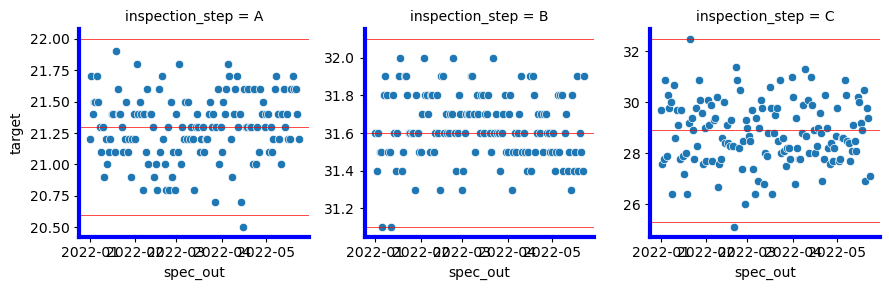

In [172]:
def custom(lower_spec, target, upper_spec, **kws): 
    ax=plt.gca()
    #수평선 그리기 
    ax.axhline(lower_spec.iloc[-1], color='red', linewidth=0.5)
    ax.axhline(target.iloc[-1], color='red', linewidth=0.5)
    ax.axhline(upper_spec.iloc[-1], color='red', linewidth=0.5)
    
def if_spec_out(spec_out, **kws):
    if spec_out.sum() >0:
        ax=plt.gca()
        spins=['left', 'bottom']
        for spine in spines:
            ax.spines[spine].set_color('blue')
            ax.spines[spine].set_linewidth(3)

g = sns.FacetGrid(df_ins, sharex=False, sharey=False, col='inspection_step') # 검사 공정 값a,b,c 각각 차트 구분
g.map_dataframe(sns.scatterplot, x='date', y='value')
g.map(custom, 'lower_spec', 'target', 'upper_spec')
g.map(if_spec_out, 'spec_out')

In [173]:
# anotate 사용하기


In [ ]:
# plotly로 spec_out 강조하기 

## 기하급수적으로 커지는 y축 값을 변환해서 표현 

In [178]:
# 코로나 데이터 

covid_df = pd.read_csv('data/Covid19-India.csv')
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28568 entries, 0 to 28567
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       28568 non-null  object
 1   region     28568 non-null  object
 2   confirmed  28568 non-null  int64 
 3   active     28568 non-null  int64 
 4   cured      28568 non-null  int64 
 5   deaths     28568 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.3+ MB


<Axes: xlabel='date', ylabel='confirmed'>

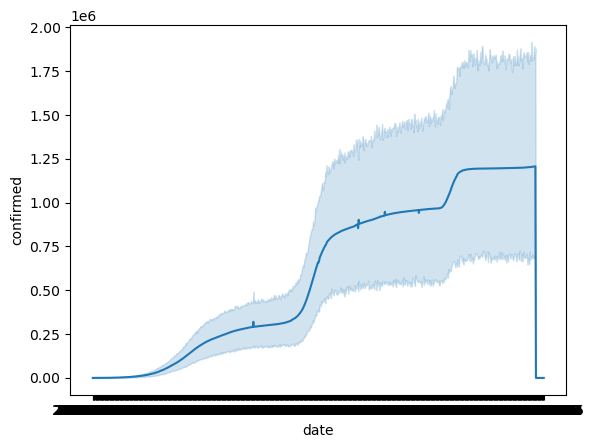

In [181]:
fig,ax = plt.subplots()
sns.lineplot(
    data=covid_df
    , x='date'
    , y='confirmed'
    , ax= ax
)

<class 'pandas.core.frame.DataFrame'>
Index: 810 entries, 15857 to 16666
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       810 non-null    object
 1   region     810 non-null    object
 2   confirmed  810 non-null    int64 
 3   active     810 non-null    int64 
 4   cured      810 non-null    int64 
 5   deaths     810 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 44.3+ KB


<Axes: xlabel='date', ylabel='confirmed'>

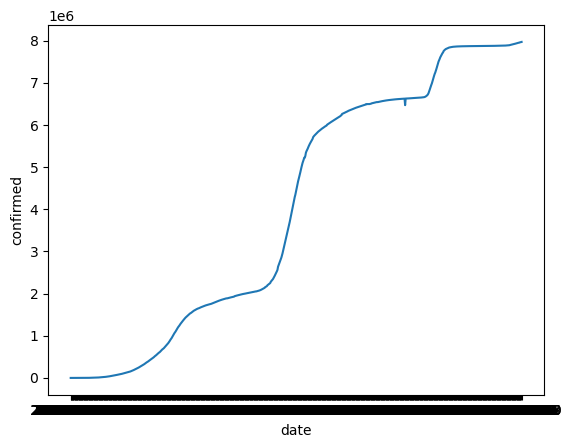

In [184]:
df_covid_Mah= covid_df.loc[covid_df.region == 'Maharashtra']
df_covid_Mah.info()

fig,ax = plt.subplots()
sns.lineplot(
    data=df_covid_Mah
    , x='date'
    , y='confirmed'
    , ax= ax
)

y값을 로그 스케일 10의 1승 ,2승, 3승 ...
로그 형식으로 변환해서 그립니다 

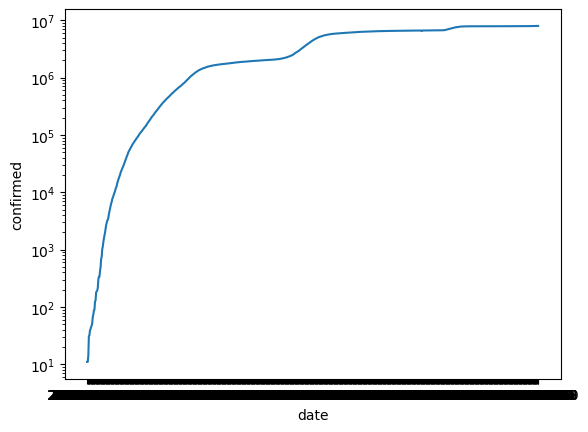

In [186]:
fig,ax = plt.subplots()
sns.lineplot(
    data=df_covid_Mah
    , x='date'
    , y='confirmed'
    , ax= ax
)
ax.set_yscale('log')

In [189]:
# plotly 에서 로그스케일

fig=px.line(
    df_covid_Mah
    , x='date'
    , y= 'confirmed'
    , width=500
    , height= 500
    , log_y= True
)
fig.show()

In [ ]:
# seaborn color palette, plotly color



## 색상 선택하기 

<Axes: xlabel='total_bill', ylabel='tip'>

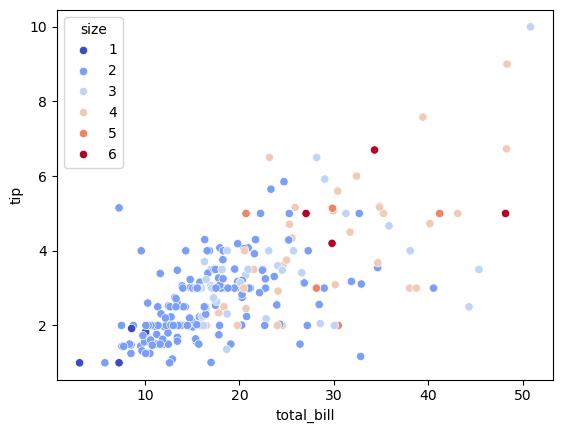

In [193]:
# seaborn 형식  ㅋㅋ 

df_tips = sns.load_dataset('tips')

# color = sns.color_palette('light:#006d2c', as_cmap=True)
color = sns.color_palette('coolwarm', as_cmap=True)

fig, ax = plt.subplots()
sns.scatterplot(
    x='total_bill'
    ,y= 'tip'
    ,data= df_tips
    ,ax= ax
    ,hue= 'size'
    ,palette=color
)

# plotly

- 범주형 : px.colors.qualitative
- 연속형 : px.colors.sequential
- 양극형 : px.colors.diverging
- 주기적 데이터 : px.colors.cyclical 

In [195]:
fig = px.colors.qualitative.swatches()
fig

#pastel1, set2, dark2 등을 많이 사용한다고 함 

In [200]:
# 연속형 변수에 적용하는 컬러맵
fig = px.colors.sequential.swatches_continuous()
fig.show()

In [199]:
px.scatter(
    df_tips
    ,x= 'total_bill'
    ,y = 'tip'
    ,width=500
    ,height=500
    ,color='size'
    ,color_continuous_scale='Viridis'
)